# Modelo de Medias Moviles

In [2]:
using Pkg
Pkg.add("CSV")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed PooledArrays ──────────────── v0.5.2
 Installed IteratorInterfaceExtensions ─ v1.0.0
 Installed Parsers ───────────────────── v0.3.6
 Installed TableTraits ───────────────── v1.0.0
 Installed CategoricalArrays ─────────── v0.5.4
 Installed Tables ────────────────────── v0.2.6
 Installed WeakRefStrings ────────────── v0.6.1
 Installed DataFrames ────────────────── v0.18.3
 Installed CSV ───────────────────────── v0.5.6
  Updating `~/.julia/environments/v1.1/Project.toml`
  [336ed68f] + CSV v0.5.6
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [336ed68f] + CSV v0.5.6
  [324d7699] + CategoricalArrays v0.5.4
  [a93c6f00] + DataFrames v0.18.3
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [69de0a69] + Parsers v0.3.6
  [2dfb63ee] + PooledArrays v0.5.2


┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1186


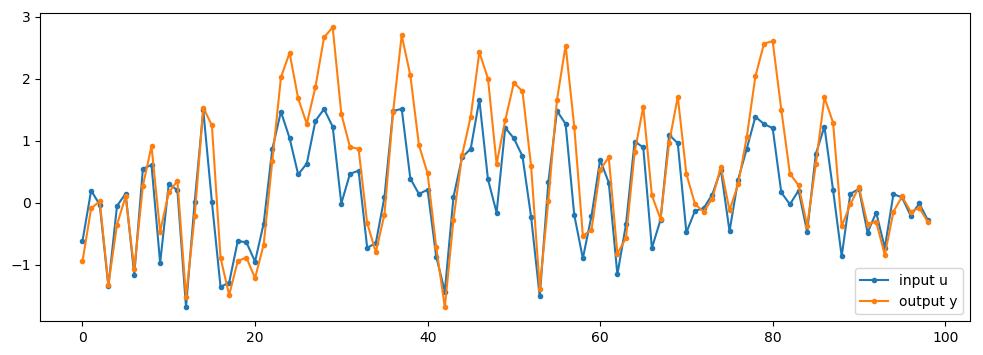

In [3]:
using CSV
# Load the data file (ref: Boyd/263)
raw = CSV.read("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

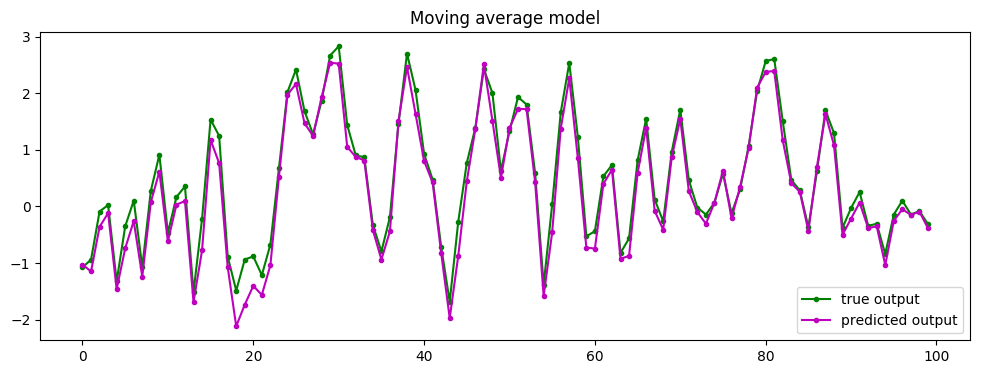


2.488312734522067


In [6]:
# generate A matrix. Using more width creates better fit.  (MA model)
width = 3
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
wopt = A\y
yest = A*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Modelo de Medias Moviles");
println()
println(norm(yest-y))

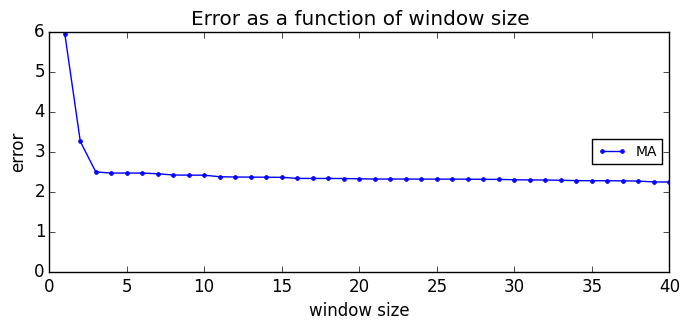

In [5]:
# compute the error that the moving average model makes
MaxWidth = 40
errMA = zeros(MaxWidth)
for width = 1:MaxWidth
    AMA = zeros(T,width)
    for i = 1:width
        AMA[i:end,i] = u[1:end-i+1]
    end
    wMA = AMA\y
    yMAest = AMA*wMA
    errMA[width] = norm(y-yMAest)
end
figure(figsize=(8,3))
title("Error as a function of window size")
plot(1:MaxWidth,errMA,"b.-")
xlabel("window size")
ylabel("error")
legend(["MA"],loc="right",fontsize=10)
ylim([0,6])
;